In [4]:
# Load the cleaned dataset (df_cleaned) from Week 2
import pandas as pd

# Assuming df_cleaned is already available, if not load it from your saved CSV
df_cleaned = pd.read_csv("../../Data/clean/fitness_profiles_clean.csv")

# Check the first few rows of the cleaned dataset
df_cleaned.head(10)

,Age,gender_enc,BMI,goal_enc,plan_key
0,34.0,0,25.1,1,S_MOD_3D_35_50
1,26.0,0,25.3,1,S_MOD_3D_35_50
2,22.0,1,18.9,0,C_STD_4D_35_45
3,54.0,0,22.7,0,C_CONS_3D_20_30
4,34.0,0,17.4,1,S_MOD_3D_35_50
5,38.0,0,21.2,0,C_MOD_3_4D_30_40
6,44.0,0,14.2,0,C_MOD_3_4D_30_40
7,50.0,0,33.3,1,S_CONS_2_3D_30_40
8,18.0,0,35.0,0,C_CONS_3D_20_30
9,34.0,0,21.8,0,C_MOD_3_4D_30_40


In [5]:
# Create feature set (X) and label set (y)
X = df_cleaned[["Age", "gender_enc", "BMI", "goal_enc"]]  # Features
y = df_cleaned["plan_key"]  # Target label (plan_key)

# Check the first few rows of features and labels
print("Feature Set (X):")
print(X.head())

print("\nLabel Set (y):")
print(y.head())


Feature Set (X):
    Age  gender_enc   BMI  goal_enc
0  34.0           0  25.1         1
1  26.0           0  25.3         1
2  22.0           1  18.9         0
3  54.0           0  22.7         0
4  34.0           0  17.4         1

Label Set (y):
0     S_MOD_3D_35_50
1     S_MOD_3D_35_50
2     C_STD_4D_35_45
3    C_CONS_3D_20_30
4     S_MOD_3D_35_50
Name: plan_key, dtype: object


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the size of the training and validation sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_valid.shape[0]} samples")


Training set size: 1394 samples
Validation set size: 349 samples


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree model
clf = DecisionTreeClassifier(
    max_depth=3,  # Keep the tree shallow for better interpretability (Matches your expected depth)
    min_samples_leaf=5,  # Prevents overfitting by ensuring at least 5 samples per leaf
    min_samples_split=10,  # Ensures that splits occur only if there are at least 10 samples
    class_weight='balanced',  # Automatically adjust weights inversely proportional to class frequencies
    random_state=42,  # Ensures reproducibility of the model
    criterion='gini'  # Use Gini impurity for splitting nodes (can also use 'entropy' for information gain)
)

# Train the model on the training dataset
clf.fit(X_train, y_train)

# Print the trained model's details
print("Trained Decision Tree Model:")
print(clf)
# Print feature importances (helpful to understand which features are more important)
print("Feature importances:", clf.feature_importances_)


Trained Decision Tree Model:
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)
Feature importances: [0.55808798 0.         0.22135879 0.22055323]


In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_pred = clf.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)

# Print accuracy
print(f"\nModel Accuracy: {accuracy:.4f}")

# Print the classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))



Model Accuracy: 0.8453

Classification Report:
                   precision    recall  f1-score   support

  C_CONS_3D_20_30       1.00      0.49      0.66        75
 C_MOD_3_4D_30_40       0.75      1.00      0.86       114
   C_STD_4D_35_45       1.00      1.00      1.00        71
S_CONS_2_3D_30_40       1.00      0.38      0.56        26
   S_MOD_3D_35_50       0.70      1.00      0.82        37
   S_STD_3D_45_60       1.00      1.00      1.00        26

         accuracy                           0.85       349
        macro avg       0.91      0.81      0.82       349
     weighted avg       0.89      0.85      0.83       349



In [11]:
import joblib

# Save the trained model for future use
joblib.dump(clf, "../../ML/models/model_v1.pkl")

print("\nModel saved to 'ML/models/model_v1.pkl'")



Model saved to 'ML/models/model_v1.pkl'


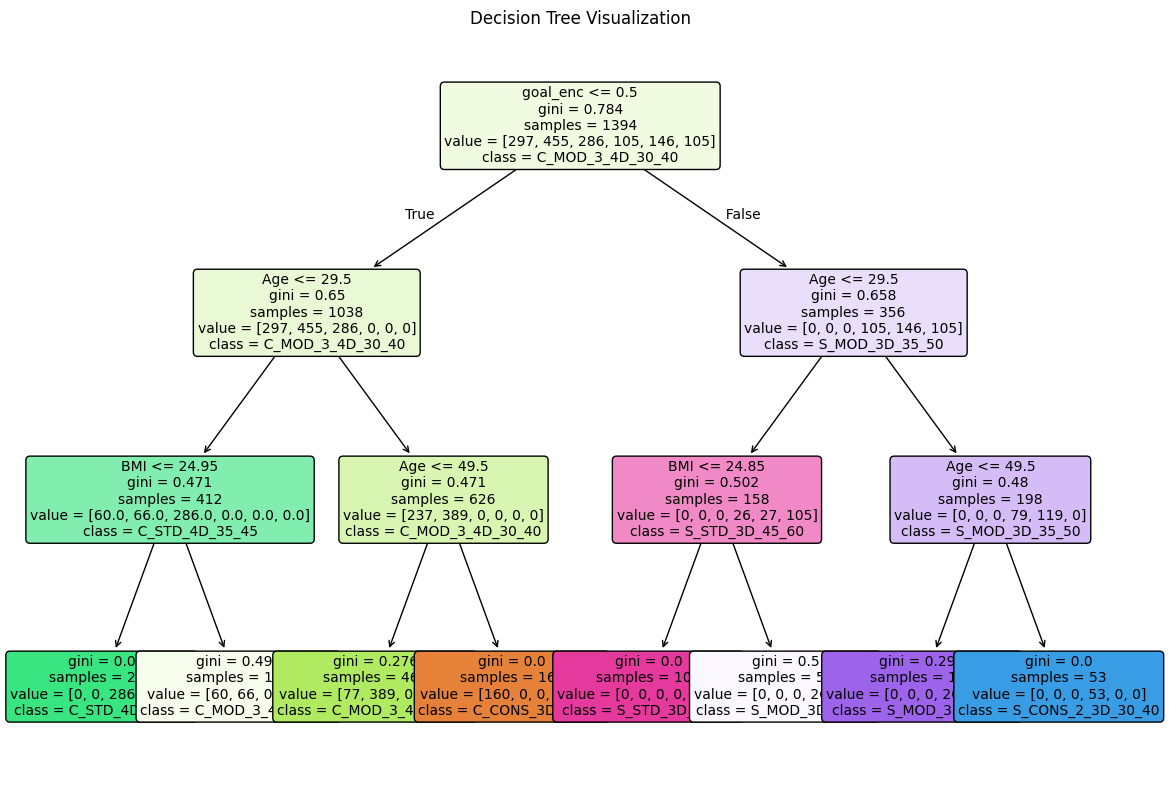

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf, 
    feature_names=X.columns, 
    class_names=clf.classes_.astype(str), 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_pred = clf.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Print the classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))



Model Accuracy: 0.8453

Classification Report:
                   precision    recall  f1-score   support

  C_CONS_3D_20_30       1.00      0.49      0.66        75
 C_MOD_3_4D_30_40       0.75      1.00      0.86       114
   C_STD_4D_35_45       1.00      1.00      1.00        71
S_CONS_2_3D_30_40       1.00      0.38      0.56        26
   S_MOD_3D_35_50       0.70      1.00      0.82        37
   S_STD_3D_45_60       1.00      1.00      1.00        26

         accuracy                           0.85       349
        macro avg       0.91      0.81      0.82       349
     weighted avg       0.89      0.85      0.83       349

